**Preprocessing**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math
from tqdm import tqdm
import pickle
import numba

In [2]:
class DataStructureForRecommendation:
  def __init__(self,path):
    self.ratings = pd.read_csv(path)
    self.user_to_idx = {}
    self.movie_to_idx = {}
    self.idx_to_user = []
    self.idx_to_movie = []
    self.data_by_user_idx = []
    self.data_by_movie_idx = []
    for Index ,userId , movieId, rating, timestamp in self.ratings.itertuples():
      if userId not in self.user_to_idx:
        self.user_to_idx[userId] = len(self.idx_to_user)
        self.idx_to_user.append(userId)
        self.data_by_user_idx.append([])
      self.data_by_user_idx[self.user_to_idx[userId]].append((movieId,rating))
      if movieId not in self.movie_to_idx:
        self.movie_to_idx[movieId] = len(self.idx_to_movie)
        self.idx_to_movie.append(movieId)
        self.data_by_movie_idx.append([])
      self.data_by_movie_idx[self.movie_to_idx[movieId]].append((userId,rating))




  def getmovie(self,movieid):
    return self.data_by_movie_idx[self.movie_to_idx[movieid]]


  def getuser(self,userid):
    return self.data_by_user_idx[self.user_to_idx[userid]]

  def getalluserslist(self):
    return self.data_by_user_idx

  def getallmovieslist(self):
    return self.data_by_movie_idx

  def getuserfromidex(self,user):
    return self.user_to_idx

  def getmoviefromidex(self,movie):
    return self.movie_to_idx

  def get_train_test_user(self):
    data_by_users = self.data_by_user_idx
    train_data = []
    test_data = []
    for i in range(len(data_by_user)):
      train_data.append([])
      test_data.append([])
      for j in range(len(data_by_user[i])):
        ran = random.uniform(0,1)
        if ran >= 0.9:
          test_data[i].append(data_by_user[i][j])
        else:
          train_data[i].append(data_by_user[i][j])
    return train_data,test_data

  def get_train_test_movies(self):
    data_by_movie = self.data_by_movie_idx
    train_data = []
    test_data = []
    for i in range(len(data_by_movie)):
      train_data.append([])
      test_data.append([])
      for j in range(len(data_by_movie[i])):
        ran = random.uniform(0,1)
        if rax= moviedegree.index
y= moviedegree.values
plt.scatter(np.log(x),np.log(y))n >= 0.9:
          test_data[i].append(data_by_movie[i][j])
        else:
          train_data[i].append(data_by_movie[i][j])
    return train_data,test_data









In [3]:
dataset = DataStructureForRecommendation('/var/autofs/misc/home/omer/Downloads/ml-25m/ratings.csv')

data_by_user = dataset.getalluserslist()
data_by_movie = dataset.getallmovieslist()

movie_train_data,movie_test_data=dataset.get_train_test_movies()
user_train_data,user_test_data=dataset.get_train_test_user()

movie_to_idx=dataset.getmoviefromidex(1)
user_to_idx = dataset.getuserfromidex(1)


Exploring the dataset

In [5]:
movielistSorted = sorted(data_by_movie,key=len,reverse=True)
userlistSorted = sorted(data_by_user,key=len,reverse=True)


In [6]:
userdegree = []
for i in userlistSorted:
  userdegree.append(len(i))

In [7]:
moviedegree = []
for i in movielistSorted:
  moviedegree.append(len(i))

In [8]:
moviedegree=pd.value_counts(moviedegree)
userdegree = pd.value_counts(userdegree)


/tmp/ipykernel_12337/3437795464.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  moviedegree=pd.value_counts(moviedegree)
/tmp/ipykernel_12337/3437795464.py:1: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  moviedegree=pd.value_counts(moviedegree)
/tmp/ipykernel_12337/3437795464.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  userdegree = pd.value_counts(userdegree)
/tmp/ipykernel_12337/3437795464.py:2: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  userdegree = pd.value_counts(userdegree)


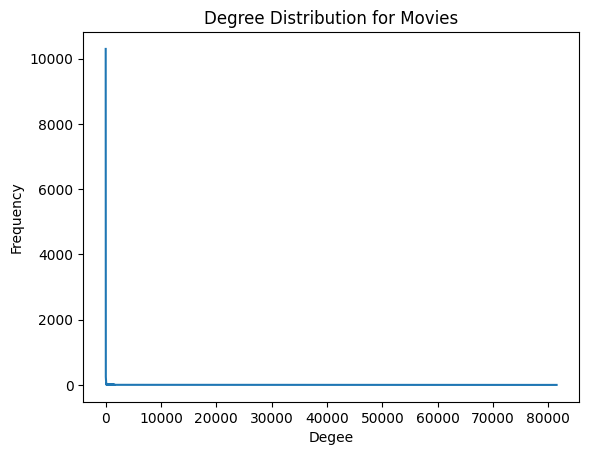

In [10]:
fig,axes =plt.subplots()
axes.set_xlabel('Degee')
axes.set_ylabel('Frequency')
axes.set_title('Degree Distribution for Movies')
axes.plot(moviedegree)
plt.savefig('moviesdegree.svg')

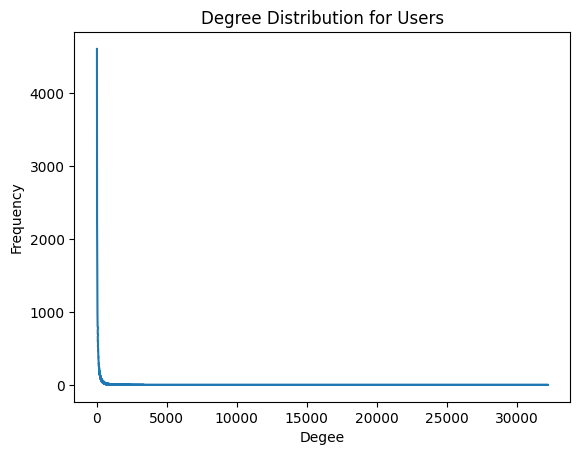

In [11]:
fig,axes =plt.subplots()
axes.set_xlabel('Degee')
axes.set_ylabel('Frequency')
axes.set_title('Degree Distribution for Users')
axes.plot(userdegree)
plt.savefig('usersdegree.svg')

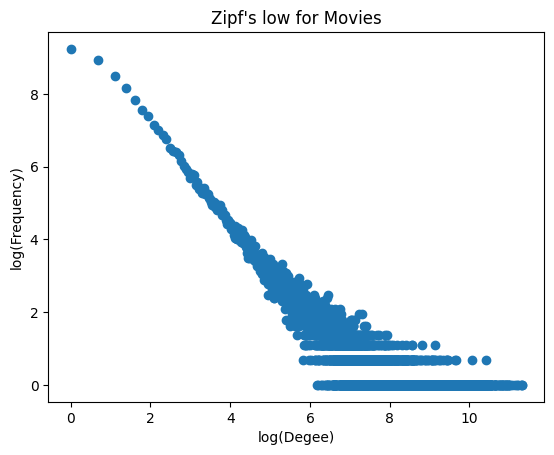

In [37]:
x= moviedegree.index
y= moviedegree.values
fig,axes =plt.subplots()
axes.scatter(np.log(x),np.log(y))
axes.set_xlabel('log(Degee)')
axes.set_ylabel('log(Frequency)')
axes.set_title("Zipf's low for Movies")
plt.savefig("moviesdegreelog.svg")

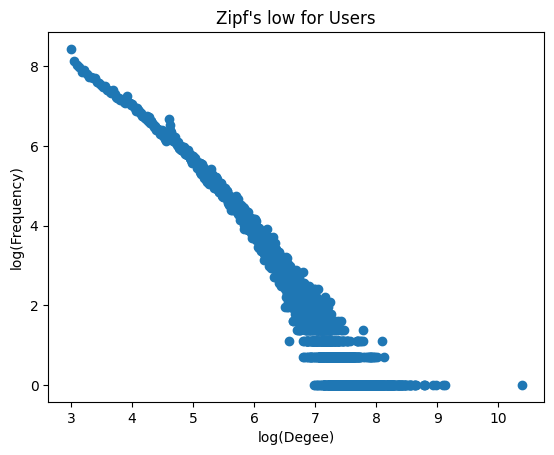

In [38]:
x= userdegree.index
y= userdegree.values
fig,axes =plt.subplots()
axes.scatter(np.log(x),np.log(y))
axes.set_xlabel('log(Degee)')
axes.set_ylabel('log(Frequency)')
axes.set_title("Zipf's low for Users")
plt.savefig("usersdegreelog.svg")

In [15]:
ratings_count = dataset.ratings['rating'].value_counts()

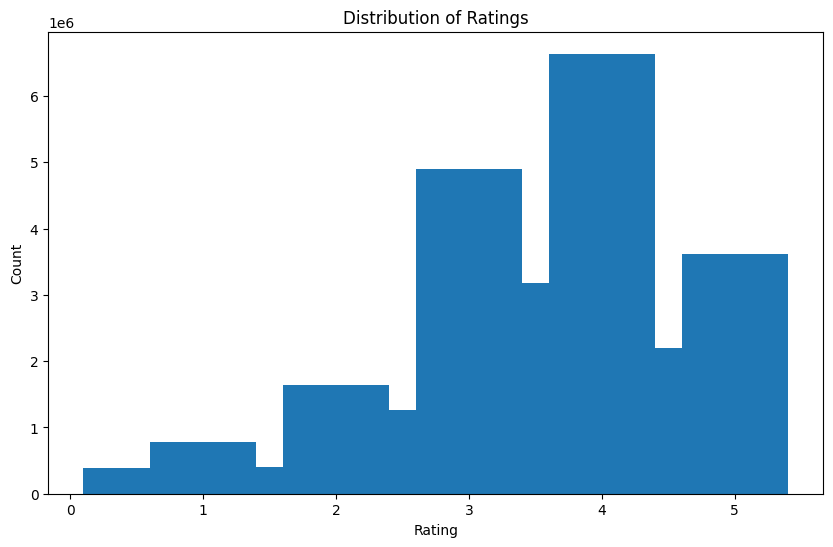

In [41]:
plt.figure(figsize=(10, 6))
plt.bar(ratings_count.index, ratings_count.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.savefig("distOfRating.svg")
plt.show()


In [18]:
movies = pd.read_csv("/var/autofs/misc/home/omer/Downloads/ml-25m/movies.csv")
ratings = dataset.ratings
movies_and_ratings= ratings.merge(movies,on='movieId')


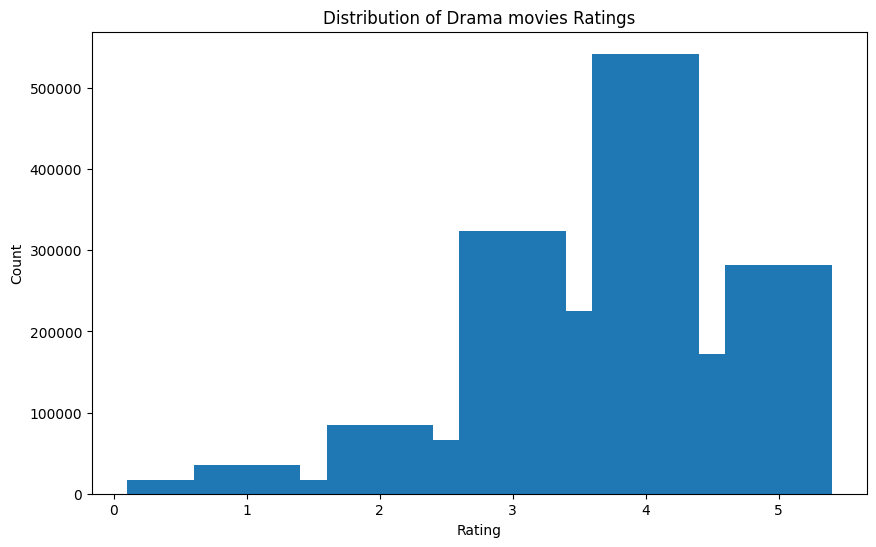

In [42]:
drama_movies_ratings = movies_and_ratings['rating'].loc[movies_and_ratings['genres'] == 'Drama'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(ratings_count.index, drama_movies_ratings)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Drama movies Ratings')
plt.savefig("distofDramaMovies.svg")
plt.show()


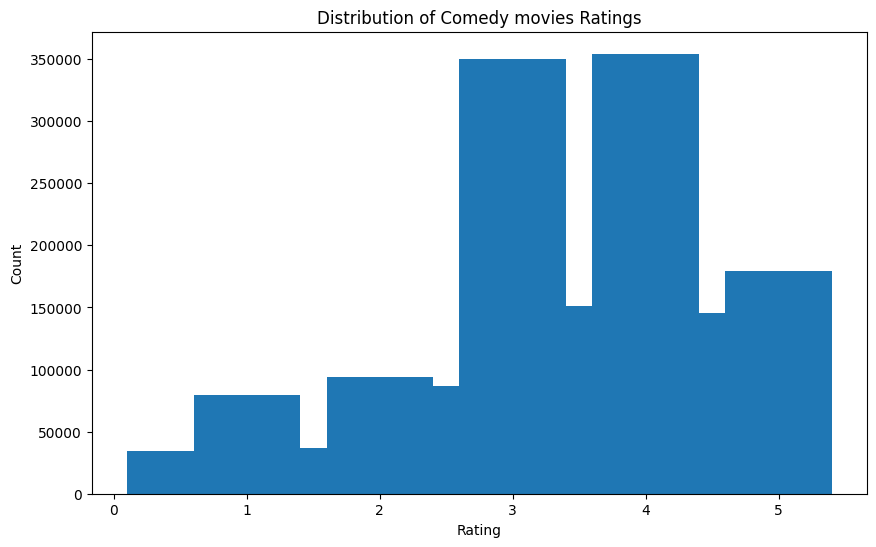

In [43]:
comedy_movies_ratings = movies_and_ratings['rating'].loc[movies_and_ratings['genres'] == 'Comedy'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(ratings_count.index, comedy_movies_ratings)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Comedy movies Ratings')
plt.savefig("distofComedyMovies.svg")
plt.show()


Using only Biases

In [26]:
def calculate_bias(bias_type):
    if bias_type == "user":
        for i in range(len(user_train_data)):
            bias_sum = 0
            item_counter = 0
            for j in range(len(user_train_data[i])):
                if user_train_data[i][j] == ():
                    continue

                movie_id = user_train_data[i][j][0]
                actual_rating = user_train_data[i][j][1]
                movie_index = movie_to_idx[movie_id]
                bias_sum += lambd * ( actual_rating - movies_biases[movie_index] )
                item_counter += 1

            if item_counter > 0:
                bias = bias_sum / ( (lambd * item_counter) + gamma)
                users_biases[i] = bias

        return users_biases

    else:
        for i in range(len(movie_train_data)):
            bias_sum = 0
            item_counter = 0
            for j in range(len(movie_train_data[i])):
                if movie_train_data[i][j] == ():
                    continue

                user_id = movie_train_data[i][j][0]
                actual_rating = movie_train_data[i][j][1]
                user_index = user_to_idx[user_id]

                bias_sum += lambd * ( actual_rating - users_biases[user_index] )
                item_counter += 1

            if item_counter > 0:
                bias = bias_sum / ((lambd * item_counter) + gamma)
                movies_biases[i] = bias

        return movies_biases




def calculate_loss():
    loss = 0
    n = 0

    for i in range(len(user_train_data)):
        for j in range(len(user_train_data[i])):
            if user_train_data[i][j] == ():
                continue

            movie_id = user_train_data[i][j][0]
            actual_rating = user_train_data[i][j][1]
            movie_index = movie_to_idx[movie_id]

            predicted_rating = users_biases[i] + movies_biases[movie_index]

            error = actual_rating - predicted_rating
            loss += error ** 2
            n = n+1
    return loss / n



def calculate_loss_test():
    loss = 0
    n = 0

    for i in range(len(user_test_data)):
        for j in range(len(user_test_data[i])):
            if user_test_data[i][j] == ():
                continue

            movie_id = user_test_data[i][j][0]
            actual_rating = user_test_data[i][j][1]
            movie_index = movie_to_idx[movie_id]

            predicted_rating = users_biases[i] + movies_biases[movie_index]

            error = actual_rating - predicted_rating
            loss += error ** 2
            n = n + 1

    return loss / n



def calculate_rmsq_test():
    rmsq = 0
    n = 0

    for i in range(len(user_test_data)):
        for j in range(len(user_test_data[i])):
            if user_test_data[i][j] == ():
                continue
            else:
                movie_id = user_test_data[i][j][0]
                movie_index = movie_to_idx[movie_id]
                actual_rating = user_test_data[i][j][1]
                
                predicted_rating = users_biases[i] + movies_biases[movie_index]


                error = actual_rating - predicted_rating
                rmsq += error ** 2
                n += 1


    rmsq = np.sqrt(rmsq / n)

    return n, rmsq


def calculate_rmsq():
    rmsq = 0
    n = 0

    for i in range(len(user_train_data)):
        for j in range(len(user_train_data[i])):
            if user_train_data[i][j] == ():
                continue
            else:
                movie_id = user_train_data[i][j][0]
                movie_index = movie_to_idx[movie_id]
                actual_rating = user_train_data[i][j][1]
                
                predicted_rating = users_biases[i] + movies_biases[movie_index]


                error = actual_rating - predicted_rating
                rmsq += error ** 2
                n += 1


    rmsq = np.sqrt(rmsq / n)
    return n, rmsq




In [27]:

loss_values_test = []
rmsq_values_test = []
loss_values = []
rmsq_values = []


repeat  = 10
lambd = 0.1
gamma = 0.1

users_biases = np.zeros(200948)
movies_biases = np.zeros(84432)



for _ in tqdm(range(repeat)):


  calculate_bias(bias_type="user")
  print("end of user bias")


  calculate_bias(bias_type="movie")
  print("end of movie bias")


  loss = calculate_loss()
  loss_values.append((lambd / 2) * loss)

  print("end of loss train")


  n,rmsq=calculate_rmsq()
  rmsq_values.append( rmsq )

  print("end of rmsq train")


  loss_test = calculate_loss_test()
  loss_values_test.append((lambd / 2) * loss_test)

  print("end of loss test ")


  n_test,rmsq_test=calculate_rmsq_test()
  rmsq_values_test.append( rmsq_test )

  
  print(f'epoch {_} : loss train {loss} , loss test {loss_test}  rmsq {rmsq}  rmsq test {rmsq_test} ')



  0%|                                                    | 0/10 [00:00<?, ?it/s]

end of user bias
end of movie bias
end of loss train
end of rmsq train
end of loss test 


 10%|████▍                                       | 1/10 [00:29<04:26, 29.66s/it]

epoch 0 : loss train 0.7491030466195192 , loss test 0.7600840871542629  rmsq 0.8655073925851351  rmsq test 0.8718280146647405 
end of user bias
end of movie bias
end of loss train
end of rmsq train
end of loss test 


 20%|████████▊                                   | 2/10 [00:57<03:49, 28.71s/it]

epoch 1 : loss train 0.7251534924838675 , loss test 0.7358458639126424  rmsq 0.8515594474162491  rmsq test 0.8578145859756888 
end of user bias
end of movie bias
end of loss train
end of rmsq train
end of loss test 


 30%|█████████████▏                              | 3/10 [01:25<03:19, 28.46s/it]

epoch 2 : loss train 0.7242775239182109 , loss test 0.734951553023  rmsq 0.8510449599863752  rmsq test 0.8572931546577285 
end of user bias
end of movie bias
end of loss train
end of rmsq train
end of loss test 


 40%|█████████████████▌                          | 4/10 [01:53<02:49, 28.26s/it]

epoch 3 : loss train 0.7242122430166448 , loss test 0.7348814022399462  rmsq 0.8510066057420734  rmsq test 0.8572522395654305 
end of user bias
end of movie bias
end of loss train
end of rmsq train
end of loss test 


 50%|██████████████████████                      | 5/10 [02:21<02:20, 28.10s/it]

epoch 4 : loss train 0.724175380699334 , loss test 0.7348422073542246  rmsq 0.8509849473987974  rmsq test 0.857229378494592 
end of user bias
end of movie bias
end of loss train
end of rmsq train
end of loss test 


 60%|██████████████████████████▍                 | 6/10 [02:50<01:53, 28.39s/it]

epoch 5 : loss train 0.7241460537932498 , loss test 0.7348114079442857  rmsq 0.8509677160699164  rmsq test 0.8572114137972532 
end of user bias
end of movie bias
end of loss train
end of rmsq train
end of loss test 


 70%|██████████████████████████████▊             | 7/10 [03:20<01:26, 28.73s/it]

epoch 6 : loss train 0.724122007079241 , loss test 0.7347862047931575  rmsq 0.8509535869124949  rmsq test 0.8571967130088387 
end of user bias
end of movie bias
end of loss train
end of rmsq train
end of loss test 


 80%|███████████████████████████████████▏        | 8/10 [03:48<00:57, 28.73s/it]

epoch 7 : loss train 0.7241011266270528 , loss test 0.7347642931050983  rmsq 0.8509413179691375  rmsq test 0.8571839318985734 
end of user bias
end of movie bias
end of loss train
end of rmsq train
end of loss test 


 90%|███████████████████████████████████████▌    | 9/10 [04:17<00:28, 28.65s/it]

epoch 8 : loss train 0.7240821468511903 , loss test 0.7347443408291545  rmsq 0.8509301656723601  rmsq test 0.8571722935496425 
end of user bias
end of movie bias
end of loss train
end of rmsq train
end of loss test 


100%|███████████████████████████████████████████| 10/10 [04:46<00:00, 28.61s/it]

epoch 9 : loss train 0.7240644315621533 , loss test 0.7347256883907216  rmsq 0.8509197562415349  rmsq test 0.8571614132651572 


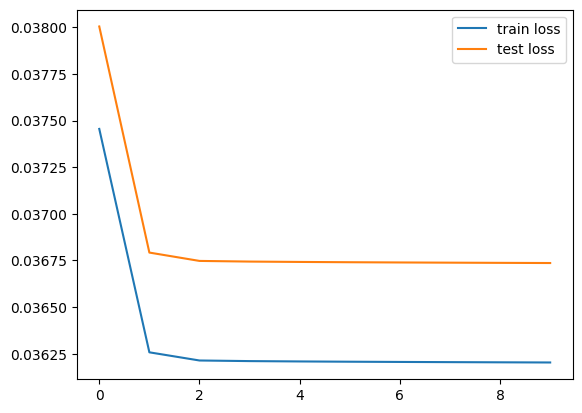

In [29]:
plt.plot(loss_values,label="Train loss")
plt.plot(loss_values_test,label="Test loss")
plt.legend(['train loss','test loss'])
plt.savefig('loss_without_factors.svg')

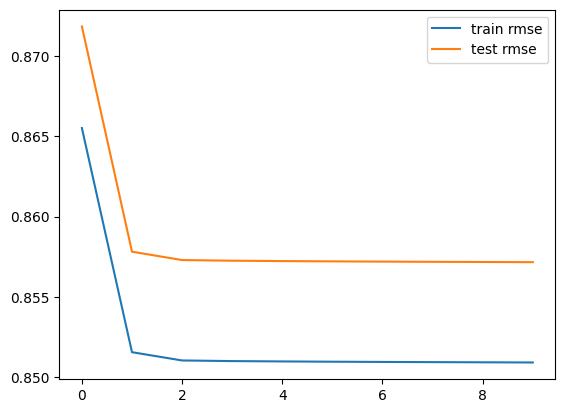

In [30]:
plt.plot(rmsq_values)
plt.plot(rmsq_values_test)
plt.legend(['train rmse','test rmse'])
plt.savefig('rmse_without_factors.svg')


adding Factors to the equation

In [4]:

def calculate_bias(bias_type):
    if bias_type == "user":
        for i in range(len(user_train_data)):
            bias_sum = 0
            item_counter = 0
            for j in range(len(user_train_data[i])):
                if user_train_data[i][j] == ():
                    continue

                movie_id = user_train_data[i][j][0]
                actual_rating = user_train_data[i][j][1]
                movie_index = movie_to_idx[movie_id]
                bias_sum += lambd * ( actual_rating - 
                                     ( np.dot( np.transpose( users_latent[:,i] ) , movies_latent[:,movie_index] )
                                      + movies_biases[movie_index] ) )
                item_counter += 1

            if item_counter > 0:
                bias = bias_sum / ( (lambd * item_counter) + gamma)
                users_biases[i] = bias

        return users_biases

    else:
        for i in range(len(movie_train_data)):
            bias_sum = 0
            item_counter = 0
            for j in range(len(movie_train_data[i])):
                if movie_train_data[i][j] == ():
                    continue

                user_id = movie_train_data[i][j][0]
                actual_rating = movie_train_data[i][j][1]
                user_index = user_to_idx[user_id]

                bias_sum += lambd * ( actual_rating - 
                                     ( np.dot( np.transpose( movies_latent[:,i]) , users_latent[:,user_index] )
                                      + users_biases[user_index] )
                                    )
                item_counter += 1

            if item_counter > 0:
                bias = bias_sum / ((lambd * item_counter) + gamma)
                movies_biases[i] = bias

        return movies_biases




def calculate_loss():
    loss = 0
    n = 0

    for i in range(len(user_train_data)):
        for j in range(len(user_train_data[i])):
            if user_train_data[i][j] == ():
                continue

            movie_id = user_train_data[i][j][0]
            actual_rating = user_train_data[i][j][1]
            movie_index = movie_to_idx[movie_id]

            predicted_rating = ( np.dot(users_latent[:, i], np.transpose(movies_latent[:, movie_index]))
                                + users_biases[i] + movies_biases[movie_index])

            error = actual_rating - predicted_rating
            loss += error ** 2
            n = n+1
    return loss / n



def calculate_loss_test():
    loss = 0
    n = 0

    for i in range(len(user_test_data)):
        for j in range(len(user_test_data[i])):
            if user_test_data[i][j] == ():
                continue

            movie_id = user_test_data[i][j][0]
            actual_rating = user_test_data[i][j][1]
            movie_index = movie_to_idx[movie_id]

            predicted_rating = (np.dot(users_latent[:, i], np.transpose(movies_latent[:, movie_index]))
                                + users_biases[i] + movies_biases[movie_index])

            error = actual_rating - predicted_rating
            loss += error ** 2
            n = n + 1

    return loss / n



def calculate_rmsq_test():
    rmsq = 0
    n = 0

    for i in range(len(user_test_data)):
        for j in range(len(user_test_data[i])):
            if user_test_data[i][j] == ():
                continue
            else:
                movie_id = user_test_data[i][j][0]
                movie_index = movie_to_idx[movie_id]
                actual_rating = user_test_data[i][j][1]
                
                predicted_rating = (
                    np.dot(users_latent[:, i], np.transpose( movies_latent[:, movie_index] ) )
                                    + users_biases[i] + movies_biases[movie_index])


                error = actual_rating - predicted_rating
                rmsq += error ** 2
                n += 1


    rmsq = np.sqrt(rmsq / n)

    return n, rmsq


def calculate_rmsq():
    rmsq = 0
    n = 0

    for i in range(len(user_train_data)):
        for j in range(len(user_train_data[i])):
            if user_train_data[i][j] == ():
                continue
            else:
                movie_id = user_train_data[i][j][0]
                movie_index = movie_to_idx[movie_id]
                actual_rating = user_train_data[i][j][1]
                
                predicted_rating = (np.dot(users_latent[:, i], np.transpose(movies_latent[:, movie_index]))
                                    + users_biases[i] + movies_biases[movie_index])


                error = actual_rating - predicted_rating
                rmsq += error ** 2
                n += 1


    rmsq = np.sqrt(rmsq / n)
    return n, rmsq





def update_user_latent_factors():
    for i in range(len(user_train_data)):
        x = np.zeros(factors)
        y = np.zeros((factors, factors))

        for j in range(len(user_train_data[i])):
            if user_train_data[i][j] == ():
                continue
            else:
               actual_rating = user_train_data[i][j][1]
               movie_id = user_train_data[i][j][0]
               movie_index = movie_to_idx[movie_id]
               error = actual_rating - users_biases[i] - movies_biases[movie_index]
               x += movies_latent[:, movie_index] * error
               y += np.outer(movies_latent[:, movie_index], movies_latent[:, movie_index])

        y += np.identity(factors) * taw  
        users_latent[:, i] = np.matmul(  np.linalg.inv(lambd * y) , lambd * x)  




def update_movie_latent_factors():
    for i in range(len(movie_train_data)):
        x = np.zeros(factors)
        y = np.zeros((factors, factors))

        for j in range(len(movie_train_data[i])):
            if movie_train_data[i][j] == ():
                continue
            else:
                user_id = movie_train_data[i][j][0]
                user_index = user_to_idx[user_id]
                r = movie_train_data[i][j][1]
                error = r - movies_biases[i] - users_biases[user_index]
                x += users_latent[:, user_index] * error
                y += np.outer(users_latent[:, user_index], users_latent[:, user_index])

        y += np.identity(factors) * taw  
        movies_latent[:, i] = np.matmul(  np.linalg.inv(lambd * y) , lambd * x)  



loss_values_test = []
rmsq_values_test = []
loss_values = []
rmsq_values = []


repeat  = 10
lambd = 0.1
gamma = 0.1
taw = 1
factors = 10

users_latent = np.random.normal(0,1/math.sqrt(factors), size=(factors,200948))
movies_latent = np.random.normal(0, 1/math.sqrt(factors), size=(factors,84432))
users_biases = np.zeros(200948)
movies_biases = np.zeros(84432)



for _ in tqdm(range(repeat)):


  calculate_bias(bias_type="user")
  print("end of user bias")

  update_user_latent_factors()
  print("end of user latent")


  calculate_bias(bias_type="movie")
  print("end of movie bias")

  update_movie_latent_factors()
  print("end of movie latent")


  loss = calculate_loss()
  loss_values.append((lambd / 2) * loss)

  print("end of loss train")


  n,rmsq=calculate_rmsq()
  rmsq_values.append( rmsq )

  print("end of rmsq train")


  loss_test = calculate_loss_test()
  loss_values_test.append((lambd / 2) * loss_test)

  print("end of loss test ")


  n_test,rmsq_test=calculate_rmsq_test()
  rmsq_values_test.append( rmsq_test )

  
  print(f'epoch {_} : loss train {loss} , loss test {loss_test}  rmsq {rmsq}  rmsq test {rmsq_test} ')





  0%|                                                    | 0/10 [00:00<?, ?it/s]

end of user bias
end of user latent
end of movie bias
end of movie latent
end of loss train
end of rmsq train
end of loss test 


 10%|████▎                                      | 1/10 [04:33<40:57, 273.02s/it]

epoch 0 : loss train 0.6861227542138962 , loss test 0.7827106895933246  rmsq 0.8283252707806856  rmsq test 0.8847093814317358 
end of user bias
end of user latent
end of movie bias
end of movie latent
end of loss train
end of rmsq train
end of loss test 


 20%|████████▌                                  | 2/10 [09:04<36:18, 272.26s/it]

epoch 1 : loss train 0.5970350977783787 , loss test 0.6959441431985618  rmsq 0.7726804629200733  rmsq test 0.8342326673048484 
end of user bias
end of user latent
end of movie bias
end of movie latent
end of loss train
end of rmsq train
end of loss test 


 30%|████████████▉                              | 3/10 [13:30<31:25, 269.37s/it]

epoch 2 : loss train 0.5532492236478805 , loss test 0.6499352055392484  rmsq 0.743807248988527  rmsq test 0.8061855900096754 
end of user bias
end of user latent
end of movie bias
end of movie latent
end of loss train
end of rmsq train
end of loss test 


 40%|█████████████████▏                         | 4/10 [17:54<26:42, 267.16s/it]

epoch 3 : loss train 0.5320896989750001 , loss test 0.6276270301955935  rmsq 0.7294447881608314  rmsq test 0.792229152578718 
end of user bias
end of user latent
end of movie bias
end of movie latent
end of loss train
end of rmsq train
end of loss test 


 50%|█████████████████████▌                     | 5/10 [22:27<22:27, 269.42s/it]

epoch 4 : loss train 0.5210657499800052 , loss test 0.6161507979893025  rmsq 0.7218488415035417  rmsq test 0.7849527361499561 
end of user bias
end of user latent
end of movie bias
end of movie latent
end of loss train
end of rmsq train
end of loss test 


 60%|█████████████████████████▊                 | 6/10 [27:38<18:53, 283.38s/it]

epoch 5 : loss train 0.5146010579770899 , loss test 0.6095577293573898  rmsq 0.7173569947920561  rmsq test 0.7807417814856522 
end of user bias
end of user latent
end of movie bias
end of movie latent
end of loss train
end of rmsq train
end of loss test 


 70%|██████████████████████████████             | 7/10 [32:17<14:05, 281.95s/it]

epoch 6 : loss train 0.5104536189845029 , loss test 0.6054093096673347  rmsq 0.7144603690790015  rmsq test 0.7780805290375379 
end of user bias
end of user latent
end of movie bias
end of movie latent
end of loss train
end of rmsq train
end of loss test 


 80%|██████████████████████████████████▍        | 8/10 [36:49<09:17, 278.93s/it]

epoch 7 : loss train 0.5076440287832559 , loss test 0.6026845159467062  rmsq 0.7124914236559313  rmsq test 0.7763275828841238 
end of user bias
end of user latent
end of movie bias
end of movie latent
end of loss train
end of rmsq train
end of loss test 


 90%|██████████████████████████████████████▋    | 9/10 [41:44<04:43, 283.74s/it]

epoch 8 : loss train 0.5057138868620606 , loss test 0.6008919562044168  rmsq 0.7111356318326769  rmsq test 0.7751722106760645 
end of user bias
end of user latent
end of movie bias
end of movie latent
end of loss train
end of rmsq train
end of loss test 


100%|██████████████████████████████████████████| 10/10 [46:25<00:00, 278.55s/it]

epoch 9 : loss train 0.5043967589580031 , loss test 0.5997288473079148  rmsq 0.7102089544338364  rmsq test 0.774421621152144 


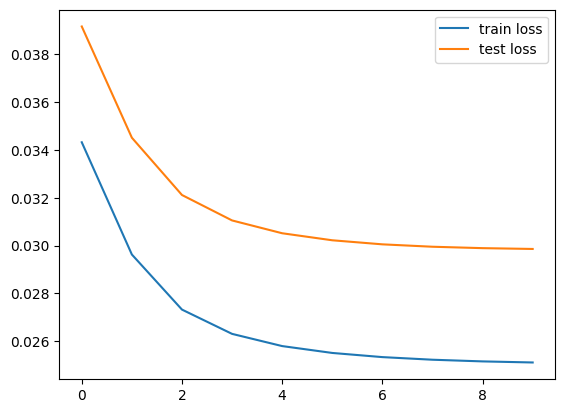

In [99]:
plt.plot(loss_values,label="Train loss")
plt.plot(loss_values_test,label="Test loss")
plt.legend(['train loss','test loss'])
plt.savefig('loss.svg')

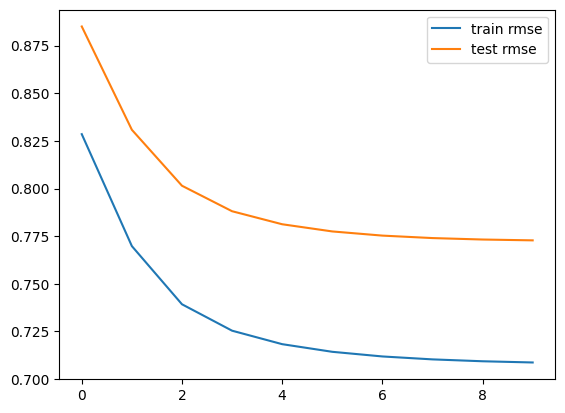

In [100]:
plt.plot(rmsq_values)
plt.plot(rmsq_values_test)
plt.legend(['train rmse','test rmse'])
plt.savefig('rmse.svg')

**Prediction**

In [101]:
movies = pd.read_csv("/var/autofs/misc/home/omer/Downloads/ml-25m/movies.csv")

In [158]:
movies.loc[movies["movieId"] == 1]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [159]:
def calculate_dummy_user_bias(user_dummy,iterations,dummy_user_latent):
    bias_sum = 0
    item_counter = 0
    for i in range(len(user_dummy)):
        movie_id= user_dummy[i][0]
        rating = user_dummy[i][1]
        movie_index = movie_to_idx[movie_id]
        
        if iterations == 0:
            bias_sum += lambd * ( rating -  movies_biases[movie_index] )
        else:
            bias_sum += lambd * ( rating - ( 
            np.dot( np.transpose( dummy_user_latent ) , movies_latent[:,movie_index] )
            + movies_biases[movie_index] ) )
            
        item_counter += 1
    if item_counter > 0:
        bias = bias_sum / ( (lambd * item_counter) + gamma)
        return bias
#         users_biases[-1] = bias

In [160]:
def update_user_latent_dummy(dummy_user,dummy_user_bias):
        x = np.zeros(factors)
        y = np.zeros((factors, factors))
        for j in range(len(dummy_user)):
            actual_rating = dummy_user[j][1]
            movie_id = dummy_user[j][0]
            movie_index = movie_to_idx[movie_id]
            error = actual_rating - dummy_user_bias - movies_biases[movie_index]
            x += movies_latent[:, movie_index] * error
            y += np.outer(np.transpose(movies_latent[:, movie_index]), movies_latent[:, movie_index])
        y += np.identity(factors) * taw  
        return np.matmul(  np.linalg.inv(lambd * y) , lambd * x)

In [161]:
user_dummy = [(1,4.0)]
dummy_user_latent = np.zeros(factors)

iterations=5
for _ in tqdm(range(iterations)):
    dummy_user_bias = calculate_dummy_user_bias(user_dummy,_,dummy_user_latent)
    dummy_user_latent =update_user_latent_dummy(user_dummy,dummy_user_bias)

100%|███████████████████████████████████████████| 5/5 [00:00<00:00, 5055.81it/s]


In [162]:
preds = []
for i in range(len(movie_to_idx)):
    preds.append(np.dot(np.transpose(dummy_user_latent),movies_latent[:,i]) + (0.05 * movies_biases[i]) )

In [163]:
pred_df = pd.DataFrame(preds,columns=["predictions"])

In [164]:
len(movies_biases)

84432

In [165]:
pred_df.sort_values("predictions",ascending=False).head(10)

,predictions
652,2.183505
174,2.140861
22443,2.119726
968,1.981058
70,1.976756
7484,1.879402
142,1.878669
7575,1.875179
43865,1.842539
7559,1.787418


In [166]:
movie_to_idx[40815]

249

In [167]:
idx_to_movie=dataset.idx_to_movie

In [168]:
movies_biases[688]

0.294666990940248

In [169]:
movies_biases[249]

0.17554918183727403

In [170]:
best_match = list(pred_df.sort_values("predictions",ascending=False).head(100).index)


In [171]:
for i in range(10):
    print(movies.loc[movies["movieId"] == idx_to_movie[best_match[i]]] )
    

       movieId               title  \
14813    78499  Toy Story 3 (2010)   

                                                 genres  
14813  Adventure|Animation|Children|Comedy|Fantasy|IMAX  
      movieId               title                                       genres
3021     3114  Toy Story 2 (1999)  Adventure|Animation|Children|Comedy|Fantasy
       movieId                                              title  \
52605   185659  Macho Madness - The Randy Savage Ultimate Coll...   

                   genres  
52605  (no genres listed)  
     movieId                        title  \
587      595  Beauty and the Beast (1991)   

                                              genres  
587  Animation|Children|Fantasy|Musical|Romance|IMAX  
   movieId             title                                       genres
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy
       movieId                                   title            genres
34665   146002  D'Artagnan and T